## ヒートマップで得たデータの詳細を図示する

In [40]:
!pwd

/Users/shihosato/src/github.com/twinkle13531/master_degree/202012/QA


In [41]:
#import aws_QA_DwaveSampler_AutoEmbedding as aqa
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import statistics
import math
import datetime
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
bit_list = [20, 25, 30, 35, 40]

In [43]:
broken_chain_proportion_dic = {20: {5: [0.4, 0.43333333333333335, 0.35, 0.35],
  10: [0.006278026905829597,
   0.002325581395348837,
   0.0030211480362537764,
   0.0017326732673267327,
   0.004347826086956522,
   0.0026373626373626374,
   0.0029411764705882353,
   0.0036211699164345407,
   0.004523809523809524,
   0.0029411764705882353],
  15: [0.0007473841554559044,
   0.0014851485148514852,
   0.0012422360248447205,
   0.0,
   0.0,
   0.0026706231454005935,
   0.0013392857142857143,
   0.0033472803347280337,
   0.00024752475247524753,
   0.0013513513513513514],
  20: [0.00064,
   0.0,
   0.0012376237623762376,
   0.0012711864406779662,
   0.0,
   0.0027593818984547464,
   0.0024390243902439024,
   0.0014492753623188406,
   0.0,
   0.002380952380952381],
  25: [0.0005057803468208093,
   0.0015151515151515152,
   0.0009615384615384616,
   0.0,
   0.0,
   0.0022500000000000003,
   0.00078125,
   0.002325581395348837,
   0.0042452830188679245,
   0.0071428571428571435],
  30: [0.0004807692307692308,
   0.0,
   0.0005952380952380953,
   0.0,
   0.0,
   0.0010115606936416186,
   0.0014285714285714286,
   0.0038759689922480624,
   0.0005319148936170213,
   0.0],
  35: [0.0005115089514066497,
   0.0,
   0.0004065040650406504,
   0.0009433962264150943,
   0.0,
   0.0009546539379474941,
   0.003703703703703704,
   0.002808988764044944,
   0.0025423728813559325,
   0.009090909090909092]},
 25: {5: [0.4],
  10: [0.01,
   0.01641025641025641,
   0.056,
   0.0,
   0.007912087912087912,
   0.02727272727272727,
   0.02171003717472119,
   0.03310344827586207,
   0.02666666666666667,
   0.013181818181818182],
  15: [0.003902439024390244,
   0.0020512820512820513,
   0.0009523809523809524,
   0.0,
   0.0004761904761904762,
   0.010158730158730159,
   0.0060818713450292395,
   0.006,
   0.0,
   0.009000000000000001],
  20: [0.0,
   0.0007407407407407407,
   0.0,
   0.0027906976744186047,
   0.004285714285714286,
   0.004912280701754386,
   0.007272727272727273,
   0.0044444444444444444,
   0.005405405405405406],
  25: [0.0,
   0.00043956043956043956,
   0.0015189873417721519,
   0.0,
   0.0010526315789473684,
   0.005384615384615384,
   0.0033333333333333335,
   0.0,
   0.0,
   0.0006451612903225806],
  30: [0.0,
   0.002564102564102564,
   0.0,
   0.0,
   0.0044444444444444444,
   0.0030075187969924814,
   0.005,
   0.013333333333333334,
   0.0022222222222222222],
  35: [0.005,
   0.0010344827586206897,
   0.0022222222222222222,
   0.0,
   0.0009523809523809524,
   0.005,
   0.0019230769230769232,
   0.01,
   0.0008695652173913044]},
 30: {5: [0.49444444444444446, 0.45],
  10: [0.026666666666666665,
   0.029166666666666667,
   0.049,
   0.06666666666666667,
   0.07037037037037037,
   0.06666666666666667,
   0.13999999999999999,
   0.16666666666666666],
  15: [0.008888888888888889,
   0.0023809523809523807,
   0.01929824561403509,
   0.008333333333333333,
   0.010810810810810811,
   0.013793103448275862,
   0.008333333333333333,
   0.002777777777777778,
   0.006060606060606061,
   0.01162280701754386],
  20: [0.0015873015873015873,
   0.008333333333333333,
   0.001388888888888889,
   0.0077777777777777776,
   0.0078125,
   0.004166666666666667,
   0.0,
   0.0044444444444444444,
   0.012121212121212121,
   0.0053639846743295016],
  25: [0.0,
   0.003703703703703704,
   0.0,
   0.0,
   0.0039548022598870055,
   0.002777777777777778,
   0.006666666666666666,
   0.0032258064516129032,
   0.004166666666666667,
   0.0032863849765258214],
  30: [0.0,
   0.0,
   0.0,
   0.007407407407407408,
   0.0031007751937984496,
   0.003703703703703704,
   0.0,
   0.0024691358024691358,
   0.0,
   0.00321285140562249],
  35: [0.0,
   0.0,
   0.0044444444444444444,
   0.0,
   0.0015151515151515152,
   0.0,
   0.0,
   0.0,
   0.0023809523809523807,
   0.0022222222222222222]},
 35: {5: [],
  10: [0.32857142857142857, 0.3630952380952381, 0.2857142857142857],
  15: [0.12142857142857143,
   0.05714285714285714,
   0.02857142857142857,
   0.11948051948051948,
   0.04285714285714286,
   0.05714285714285714,
   0.09387755102040816],
  20: [0.009523809523809523,
   0.025210084033613446,
   0.014778325123152709,
   0.013445378151260503,
   0.012499999999999999,
   0.0,
   0.02706766917293233,
   0.019047619047619046,
   0.010714285714285714,
   0.025274725274725275],
  25: [0.007142857142857143,
   0.0,
   0.02207792207792208,
   0.007142857142857143,
   0.007792207792207792,
   0.02,
   0.009523809523809523,
   0.005291005291005291,
   0.0,
   0.013445378151260503],
  30: [0.015584415584415584,
   0.0,
   0.010714285714285714,
   0.007142857142857143,
   0.004511278195488722,
   0.007619047619047619,
   0.011904761904761904,
   0.008791208791208791,
   0.014285714285714285,
   0.017142857142857144],
  35: [0.004081632653061224,
   0.0,
   0.009523809523809523,
   0.0,
   0.0,
   0.009523809523809523,
   0.004481792717086834,
   0.004464285714285714]},
 40: {5: [],
  10: [0.4083333333333333],
  15: [0.10833333333333334, 0.1423076923076923, 0.0, 0.025, 0.125],
  20: [0.023076923076923078,
   0.03214285714285715,
   0.02894736842105263,
   0.0125,
   0.037500000000000006,
   0.025,
   0.05,
   0.025,
   0.01388888888888889,
   0.008333333333333333],
  25: [0.0125,
   0.008333333333333333,
   0.01818181818181818,
   0.0,
   0.05,
   0.029166666666666667,
   0.015000000000000001,
   0.02291666666666667,
   0.009090909090909092],
  30: [0.0125,
   0.0,
   0.008333333333333333,
   0.00625,
   0.006818181818181819,
   0.025,
   0.0125,
   0.0125,
   0.0071428571428571435,
   0.008333333333333333],
  35: [0.025, 0.0, 0.010714285714285714, 0.0, 0.0125, 0.0, 0.0]}}

#46: {5: [],10: [],15: [],20: [0.08152173913043478, 0.021739130434782608],25: [0.0],30: [0.02717391304347826],35: []}

In [44]:
## 5が出ないのが多いので、削除
for bit in bit_list:
    del broken_chain_proportion_dic[bit][5]

In [45]:
broken_chain_proportion_dic

{20: {10: [0.006278026905829597,
   0.002325581395348837,
   0.0030211480362537764,
   0.0017326732673267327,
   0.004347826086956522,
   0.0026373626373626374,
   0.0029411764705882353,
   0.0036211699164345407,
   0.004523809523809524,
   0.0029411764705882353],
  15: [0.0007473841554559044,
   0.0014851485148514852,
   0.0012422360248447205,
   0.0,
   0.0,
   0.0026706231454005935,
   0.0013392857142857143,
   0.0033472803347280337,
   0.00024752475247524753,
   0.0013513513513513514],
  20: [0.00064,
   0.0,
   0.0012376237623762376,
   0.0012711864406779662,
   0.0,
   0.0027593818984547464,
   0.0024390243902439024,
   0.0014492753623188406,
   0.0,
   0.002380952380952381],
  25: [0.0005057803468208093,
   0.0015151515151515152,
   0.0009615384615384616,
   0.0,
   0.0,
   0.0022500000000000003,
   0.00078125,
   0.002325581395348837,
   0.0042452830188679245,
   0.0071428571428571435],
  30: [0.0004807692307692308,
   0.0,
   0.0005952380952380953,
   0.0,
   0.0,
   0.0010115

In [46]:
valid_y_num_dic = {20: {5: [3, 3, 1, 1],
  10: [223, 172, 331, 202, 46, 455, 102, 359, 210, 51],
  15: [669, 101, 161, 126, 21, 674, 112, 239, 202, 37],
  20: [625, 65, 202, 118, 27, 453, 82, 138, 109, 21],
  25: [692, 33, 104, 145, 17, 400, 64, 129, 106, 14],
  30: [312, 27, 168, 103, 6, 346, 35, 129, 94, 11],
  35: [391, 45, 123, 106, 15, 419, 27, 89, 59, 11]},
 25: {5: [1],
  10: [8, 39, 5, 4, 91, 22, 269, 29, 3, 88],
  15: [41, 351, 42, 8, 84, 63, 171, 20, 12, 120],
  20: [15, 108, 31, 43, 28, 57, 22, 9, 37],
  25: [28, 91, 79, 2, 38, 52, 156, 14, 9, 62],
  30: [26, 78, 10, 14, 9, 133, 16, 3, 54],
  35: [8, 116, 18, 10, 42, 16, 104, 16, 46]},
 30: {5: [6, 4],
  10: [5, 16, 100, 1, 9, 2, 15, 57],
  15: [15, 14, 38, 8, 111, 29, 20, 12, 11, 152],
  20: [21, 4, 24, 30, 64, 8, 4, 15, 11, 87],
  25: [9, 9, 18, 9, 118, 12, 10, 31, 8, 71],
  30: [1, 3, 3, 9, 86, 18, 3, 27, 8, 83],
  35: [10, 1, 30, 4, 44, 4, 6, 4, 14, 45]},
 35: {5: [],
  10: [2, 24, 1],
  15: [8, 3, 1, 22, 14, 2, 7],
  20: [3, 17, 29, 17, 16, 3, 19, 18, 8, 26],
  25: [4, 4, 22, 8, 22, 10, 24, 27, 6, 17],
  30: [11, 6, 8, 8, 19, 15, 12, 39, 2, 5],
  35: [7, 8, 12, 3, 7, 6, 51, 32]},
 40: {5: [],
  10: [9],
  15: [3, 13, 1, 1, 5],
  20: [13, 14, 19, 4, 2, 4, 1, 2, 9, 3],
  25: [2, 9, 11, 1, 2, 6, 5, 12, 11],
  30: [4, 4, 3, 8, 11, 1, 2, 4, 7, 3],
  35: [2, 1, 7, 2, 6, 3, 6]}}

#46: {5: [], 10: [], 15: [], 20: [4, 1], 25: [1], 30: [4], 35: []}

In [47]:
for bit in bit_list:
    del valid_y_num_dic[bit][5]

In [48]:
valid_y_num_dic

{20: {10: [223, 172, 331, 202, 46, 455, 102, 359, 210, 51],
  15: [669, 101, 161, 126, 21, 674, 112, 239, 202, 37],
  20: [625, 65, 202, 118, 27, 453, 82, 138, 109, 21],
  25: [692, 33, 104, 145, 17, 400, 64, 129, 106, 14],
  30: [312, 27, 168, 103, 6, 346, 35, 129, 94, 11],
  35: [391, 45, 123, 106, 15, 419, 27, 89, 59, 11]},
 25: {10: [8, 39, 5, 4, 91, 22, 269, 29, 3, 88],
  15: [41, 351, 42, 8, 84, 63, 171, 20, 12, 120],
  20: [15, 108, 31, 43, 28, 57, 22, 9, 37],
  25: [28, 91, 79, 2, 38, 52, 156, 14, 9, 62],
  30: [26, 78, 10, 14, 9, 133, 16, 3, 54],
  35: [8, 116, 18, 10, 42, 16, 104, 16, 46]},
 30: {10: [5, 16, 100, 1, 9, 2, 15, 57],
  15: [15, 14, 38, 8, 111, 29, 20, 12, 11, 152],
  20: [21, 4, 24, 30, 64, 8, 4, 15, 11, 87],
  25: [9, 9, 18, 9, 118, 12, 10, 31, 8, 71],
  30: [1, 3, 3, 9, 86, 18, 3, 27, 8, 83],
  35: [10, 1, 30, 4, 44, 4, 6, 4, 14, 45]},
 35: {10: [2, 24, 1],
  15: [8, 3, 1, 22, 14, 2, 7],
  20: [3, 17, 29, 17, 16, 3, 19, 18, 8, 26],
  25: [4, 4, 22, 8, 22, 10, 

In [49]:
chain_strength_list = [10, 15, 20, 25, 30, 35]

In [39]:
#(((2-9)**2 + (24-9)**2 + (1-9)**2)/3)**0.5, statistics.pstdev([2, 24, 1]), statistics.stdev([2, 24, 1]), statistics.mean([2, 24, 1])

(10.614455552060438, 10.614455552060438, 13.0, 9)

In [50]:
mean_broken_chain_proportion_dic = {}
std_broken_chain_proportion_dic = {}
for bit in bit_list:
    mean_broken_chain_proportion_dic[bit] = {}
    std_broken_chain_proportion_dic[bit] = {}
    for chain_strength in chain_strength_list:
        mean_broken_chain_proportion_dic[bit][chain_strength] = statistics.mean(broken_chain_proportion_dic[bit][chain_strength])
        if len(broken_chain_proportion_dic[bit][chain_strength])==1:
            std_broken_chain_proportion_dic[bit][chain_strength]=0
        else:
            std_broken_chain_proportion_dic[bit][chain_strength] = statistics.pstdev(broken_chain_proportion_dic[bit][chain_strength])

In [51]:
mean_broken_chain_proportion_dic

{20: {10: 0.003436995071049864,
  15: 0.001243083399339305,
  20: 0.0012177444235024074,
  25: 0.001972744188058469,
  30: 0.0007924023334085457,
  35: 0.002096203762082356},
 25: {10: 0.021225704189413972,
  15: 0.0038622894008003123,
  20: 0.0033168900583561266,
  25: 0.0012374289368551259,
  30: 0.00339684681789945,
  35: 0.00300019200818801},
 30: {10: 0.07690046296296296,
  15: 0.00922998586655574,
  20: 0.005299610949395432,
  25: 0.0027781808502840544,
  30: 0.0019893873513001188,
  35: 0.0010562770562770564},
 35: {10: 0.3257936507936508,
  15: 0.07435727537768354,
  20: 0.015756189604139853,
  25: 0.009241603712191947,
  30: 0.00976964263806369,
  35: 0.004009416266506602},
 40: {10: 0.4083333333333333,
  15: 0.08012820512820512,
  20: 0.02563893708630551,
  25: 0.018354377104377106,
  30: 0.009937770562770563,
  35: 0.0068877551020408165}}

In [52]:
std_broken_chain_proportion_dic

{20: {10: 0.0012474023880781713,
  15: 0.0010427106491097005,
  20: 0.0010030241516713993,
  25: 0.0021138324019036015,
  30: 0.001125902895890024,
  35: 0.0026268550091358544},
 25: {10: 0.015028072277163657,
  15: 0.0035858993095331812,
  20: 0.002442283950495187,
  25: 0.0016975774642030992,
  30: 0.003933358931237426,
  35: 0.0029881145189770077},
 30: {10: 0.04726522455376285,
  15: 0.004803394975570119,
  20: 0.0035689426555336177,
  25: 0.0020712979526436854,
  30: 0.0023461529757697976,
  35: 0.0014662456882373726},
 35: {10: 0.03165164540096709,
  15: 0.03446349981884959,
  20: 0.008050971527749449,
  25: 0.007039868241777811,
  30: 0.004996004124850584,
  35: 0.003699300327744959},
 40: {10: 0,
  15: 0.05680659137056781,
  20: 0.011853069274941107,
  25: 0.013775329036153831,
  30: 0.006177512143049561,
  35: 0.008975822492734277}}

In [53]:
mean_valid_y_num_dic = {}
std_valid_y_num_dic = {}
for bit in bit_list:
    mean_valid_y_num_dic[bit] = {}
    std_valid_y_num_dic[bit] = {}
    for chain_strength in chain_strength_list:
        mean_valid_y_num_dic[bit][chain_strength] = statistics.mean(valid_y_num_dic[bit][chain_strength])
        if len(valid_y_num_dic[bit][chain_strength])==1:
            std_valid_y_num_dic[bit][chain_strength] = 0
        else:
            std_valid_y_num_dic[bit][chain_strength] = statistics.pstdev(valid_y_num_dic[bit][chain_strength])

In [54]:
mean_valid_y_num_dic

{20: {10: 215.1, 15: 234.2, 20: 184, 25: 170.4, 30: 123.1, 35: 128.5},
 25: {10: 55.8,
  15: 91.2,
  20: 38.888888888888886,
  25: 53.1,
  30: 38.111111111111114,
  35: 41.77777777777778},
 30: {10: 25.625, 15: 41, 20: 26.8, 25: 29.5, 30: 24.1, 35: 16.2},
 35: {10: 9, 15: 8.142857142857142, 20: 15.6, 25: 14.4, 30: 12.5, 35: 15.75},
 40: {10: 9,
  15: 4.6,
  20: 7.1,
  25: 6.555555555555555,
  30: 4.7,
  35: 3.857142857142857}}

In [55]:
std_valid_y_num_dic

{20: {10: 127.3282765138993,
  15: 227.5121095678206,
  20: 188.426643551277,
  25: 203.44296498036005,
  30: 114.86727123075572,
  35: 142.8938417147499},
 25: {10: 77.59484518961295,
  15: 99.3708206668336,
  20: 27.997795327666008,
  25: 44.4059680673668,
  30: 40.73612768496083,
  35: 38.64878258188385},
 30: {10: 32.7640714045126,
  15: 46.95742752749558,
  20: 26.156452358834905,
  25: 34.78289809662214,
  30: 31.14947832628983,
  35: 16.178998732925347},
 35: {10: 10.614455552060438,
  15: 6.998542122237652,
  20: 8.272847151978574,
  25: 8.487638069569178,
  30: 10.012492197250394,
  35: 15.777753325489659},
 40: {10: 0,
  15: 4.454211490264018,
  20: 5.940538696111658,
  25: 4.085505846855608,
  30: 2.9,
  35: 2.2314999074019015}}

In [64]:
dd= {0:3, 9:8, 7:9}
np.array(dd.values()) == np.array(list(dd.values()))

array([False, False, False])

In [61]:
color_list = ['b', 'r', 'g', 'm', 'k', '#ff7f00']

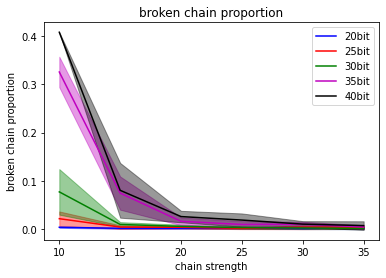

In [73]:
############################################## broken_chain_proportion ###################################################
fig, ax = plt.subplots(1)
for bit, color in zip(bit_list, color_list):
    label = '{}bit'.format(bit)
    m_chains = np.array(list(mean_broken_chain_proportion_dic[bit].values()))
    s_chains = np.array(list(std_broken_chain_proportion_dic[bit].values()))
    ax.plot(chain_strength_list, m_chains, label=label, color=color)
    ax.fill_between(chain_strength_list, m_chains+s_chains, m_chains-s_chains, alpha=0.4, color=color) 

ax.legend(loc='upper right')
ax.set_xlabel('chain strength')
ax.set_ylabel('broken chain proportion')

ax.set_xticks(chain_strength_list)
#ax.set_yscale('log')
plt.title('broken chain proportion')
plt.savefig('slide/broken_chain_proportion_std.png')
plt.show()

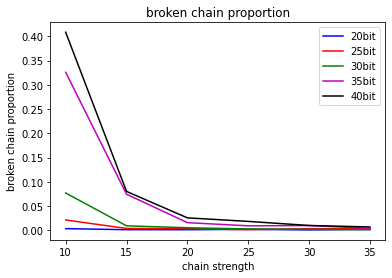

In [75]:
############################################## broken_chain_proportion ###################################################
fig, ax = plt.subplots(1)
for bit, color in zip(bit_list, color_list):
    label = '{}bit'.format(bit)
    m_chains = np.array(list(mean_broken_chain_proportion_dic[bit].values()))
    ax.plot(chain_strength_list, m_chains, label=label, color=color)

ax.legend(loc='upper right')
ax.set_xlabel('chain strength')
ax.set_ylabel('broken chain proportion')

ax.set_xticks(chain_strength_list)
#ax.set_yscale('log')
plt.title('broken chain proportion')
plt.savefig('slide/broken_chain_proportion.png')
plt.show()

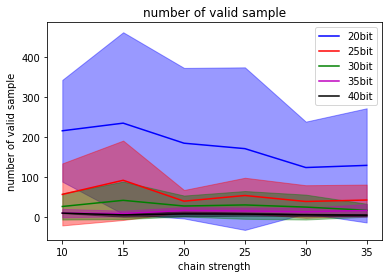

In [71]:
############################################## valid_y_num ###################################################
fig, ax = plt.subplots(1)
for bit, color in zip(bit_list, color_list):
    label = '{}bit'.format(bit)
    m_ynum = np.array(list(mean_valid_y_num_dic[bit].values()))
    s_ynum = np.array(list(std_valid_y_num_dic[bit].values()))
    ax.plot(chain_strength_list, m_ynum, label=label, color=color)
    ax.fill_between(chain_strength_list, m_ynum+s_ynum, m_ynum-s_ynum, alpha=0.4, color=color) 

ax.legend(loc='upper right')
ax.set_xlabel('chain strength')
ax.set_ylabel('number of valid sample')

ax.set_xticks(chain_strength_list)
#ax.set_yscale('log')
plt.title('number of valid sample')
plt.savefig('slide/number_of_valid_sample_std.png')
plt.show()

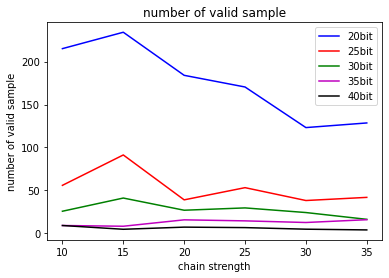

In [72]:
############################################## valid_y_num ###################################################
fig, ax = plt.subplots(1)
for bit, color in zip(bit_list, color_list):
    label = '{}bit'.format(bit)
    m_ynum = np.array(list(mean_valid_y_num_dic[bit].values()))
    ax.plot(chain_strength_list, m_ynum, label=label, color=color)

ax.legend(loc='upper right')
ax.set_xlabel('chain strength')
ax.set_ylabel('number of valid sample')

ax.set_xticks(chain_strength_list)
#ax.set_yscale('log')
plt.title('number of valid sample')
plt.savefig('slide/number_of_valid_sample.png')
plt.show()

In [39]:
broken_chain_proportion_dic

{20: {5: [0.4, 0.43333333333333335, 0.35, 0.35],
  10: [0.006278026905829597,
   0.002325581395348837,
   0.0030211480362537764,
   0.0017326732673267327,
   0.004347826086956522,
   0.0026373626373626374,
   0.0029411764705882353,
   0.0036211699164345407,
   0.004523809523809524,
   0.0029411764705882353],
  15: [0.0007473841554559044,
   0.0014851485148514852,
   0.0012422360248447205,
   0.0,
   0.0,
   0.0026706231454005935,
   0.0013392857142857143,
   0.0033472803347280337,
   0.00024752475247524753,
   0.0013513513513513514],
  20: [0.00064,
   0.0,
   0.0012376237623762376,
   0.0012711864406779662,
   0.0,
   0.0027593818984547464,
   0.0024390243902439024,
   0.0014492753623188406,
   0.0,
   0.002380952380952381],
  25: [0.0005057803468208093,
   0.0015151515151515152,
   0.0009615384615384616,
   0.0,
   0.0,
   0.0022500000000000003,
   0.00078125,
   0.002325581395348837,
   0.0042452830188679245,
   0.0071428571428571435],
  30: [0.0004807692307692308,
   0.0,
   0.0005

In [40]:
valid_y_num_dic

{20: {5: [3, 3, 1, 1],
  10: [223, 172, 331, 202, 46, 455, 102, 359, 210, 51],
  15: [669, 101, 161, 126, 21, 674, 112, 239, 202, 37],
  20: [625, 65, 202, 118, 27, 453, 82, 138, 109, 21],
  25: [692, 33, 104, 145, 17, 400, 64, 129, 106, 14],
  30: [312, 27, 168, 103, 6, 346, 35, 129, 94, 11],
  35: [391, 45, 123, 106, 15, 419, 27, 89, 59, 11]},
 25: {5: [1],
  10: [8, 39, 5, 4, 91, 22, 269, 29, 3, 88],
  15: [41, 351, 42, 8, 84, 63, 171, 20, 12, 120],
  20: [15, 108, 31, 43, 28, 57, 22, 9, 37],
  25: [28, 91, 79, 2, 38, 52, 156, 14, 9, 62],
  30: [26, 78, 10, 14, 9, 133, 16, 3, 54],
  35: [8, 116, 18, 10, 42, 16, 104, 16, 46]},
 30: {5: [6, 4],
  10: [5, 16, 100, 1, 9, 2, 15, 57],
  15: [15, 14, 38, 8, 111, 29, 20, 12, 11, 152],
  20: [21, 4, 24, 30, 64, 8, 4, 15, 11, 87],
  25: [9, 9, 18, 9, 118, 12, 10, 31, 8, 71],
  30: [1, 3, 3, 9, 86, 18, 3, 27, 8, 83],
  35: [10, 1, 30, 4, 44, 4, 6, 4, 14, 45]},
 35: {5: [],
  10: [2, 24, 1],
  15: [8, 3, 1, 22, 14, 2, 7],
  20: [3, 17, 29, 17, 

In [41]:
broken_chain_proportion_46 = broken_chain_proportion_dic[46]
valid_y_num_46 = valid_y_num_dic[46]

In [42]:
broken_chain_proportion_46

{5: [],
 10: [],
 15: [],
 20: [0.08152173913043478, 0.021739130434782608],
 25: [0.0],
 30: [0.02717391304347826],
 35: []}

In [43]:
valid_y_num_46

{5: [], 10: [], 15: [], 20: [4, 1], 25: [1], 30: [4], 35: []}

In [46]:
del broken_chain_proportion_dic[46]

In [48]:
broken_chain_proportion_dic.keys()

dict_keys([20, 25, 30, 35, 40])

In [49]:
del valid_y_num_dic[46]

In [50]:
valid_y_num_dic.keys()

dict_keys([20, 25, 30, 35, 40])

In [53]:
## 5が出ないのが多いので、削除
for bit in bit_list:
    del broken_chain_proportion_dic[bit][5]
    print(broken_chain_proportion_dic[bit].keys()==[10, 15, 20, 25, 30, 35])#間違えた。得られた辞書自体に問題はない

KeyError: 5

In [54]:
broken_chain_proportion_dic

{20: {10: [0.006278026905829597,
   0.002325581395348837,
   0.0030211480362537764,
   0.0017326732673267327,
   0.004347826086956522,
   0.0026373626373626374,
   0.0029411764705882353,
   0.0036211699164345407,
   0.004523809523809524,
   0.0029411764705882353],
  15: [0.0007473841554559044,
   0.0014851485148514852,
   0.0012422360248447205,
   0.0,
   0.0,
   0.0026706231454005935,
   0.0013392857142857143,
   0.0033472803347280337,
   0.00024752475247524753,
   0.0013513513513513514],
  20: [0.00064,
   0.0,
   0.0012376237623762376,
   0.0012711864406779662,
   0.0,
   0.0027593818984547464,
   0.0024390243902439024,
   0.0014492753623188406,
   0.0,
   0.002380952380952381],
  25: [0.0005057803468208093,
   0.0015151515151515152,
   0.0009615384615384616,
   0.0,
   0.0,
   0.0022500000000000003,
   0.00078125,
   0.002325581395348837,
   0.0042452830188679245,
   0.0071428571428571435],
  30: [0.0004807692307692308,
   0.0,
   0.0005952380952380953,
   0.0,
   0.0,
   0.0010115

In [55]:
## 5が出ないのが多いので、削除
for bit in bit_list:
    del valid_y_num_dic[bit][5]
    print(valid_y_num_dic[bit].keys()==[10, 15, 20, 25, 30, 35])#間違えた。得られた辞書自体に問題はない

False
False
False
False
False


In [56]:
valid_y_num_dic#15, 15, 15, 20, 20

{20: {10: [223, 172, 331, 202, 46, 455, 102, 359, 210, 51],
  15: [669, 101, 161, 126, 21, 674, 112, 239, 202, 37],
  20: [625, 65, 202, 118, 27, 453, 82, 138, 109, 21],
  25: [692, 33, 104, 145, 17, 400, 64, 129, 106, 14],
  30: [312, 27, 168, 103, 6, 346, 35, 129, 94, 11],
  35: [391, 45, 123, 106, 15, 419, 27, 89, 59, 11]},
 25: {10: [8, 39, 5, 4, 91, 22, 269, 29, 3, 88],
  15: [41, 351, 42, 8, 84, 63, 171, 20, 12, 120],
  20: [15, 108, 31, 43, 28, 57, 22, 9, 37],
  25: [28, 91, 79, 2, 38, 52, 156, 14, 9, 62],
  30: [26, 78, 10, 14, 9, 133, 16, 3, 54],
  35: [8, 116, 18, 10, 42, 16, 104, 16, 46]},
 30: {10: [5, 16, 100, 1, 9, 2, 15, 57],
  15: [15, 14, 38, 8, 111, 29, 20, 12, 11, 152],
  20: [21, 4, 24, 30, 64, 8, 4, 15, 11, 87],
  25: [9, 9, 18, 9, 118, 12, 10, 31, 8, 71],
  30: [1, 3, 3, 9, 86, 18, 3, 27, 8, 83],
  35: [10, 1, 30, 4, 44, 4, 6, 4, 14, 45]},
 35: {10: [2, 24, 1],
  15: [8, 3, 1, 22, 14, 2, 7],
  20: [3, 17, 29, 17, 16, 3, 19, 18, 8, 26],
  25: [4, 4, 22, 8, 22, 10, 

In [61]:
new_chain_strength_list = [10, 15, 20, 25, 30, 35]
#bit_list = [20, 25, 30, 35, 40]

In [62]:
mean_broken_chain_proportion_dic = {}
for bit in bit_list:
    mean_broken_chain_proportion_dic[bit] = {}
    for chain_strength in new_chain_strength_list:
        mean_broken_chain_proportion_dic[bit][chain_strength] = statistics.mean(broken_chain_proportion_dic[bit][chain_strength])

In [63]:
mean_broken_chain_proportion_dic

{20: {10: 0.003436995071049864,
  15: 0.001243083399339305,
  20: 0.0012177444235024074,
  25: 0.001972744188058469,
  30: 0.0007924023334085457,
  35: 0.002096203762082356},
 25: {10: 0.021225704189413972,
  15: 0.0038622894008003123,
  20: 0.0033168900583561266,
  25: 0.0012374289368551259,
  30: 0.00339684681789945,
  35: 0.00300019200818801},
 30: {10: 0.07690046296296296,
  15: 0.00922998586655574,
  20: 0.005299610949395432,
  25: 0.0027781808502840544,
  30: 0.0019893873513001188,
  35: 0.0010562770562770564},
 35: {10: 0.3257936507936508,
  15: 0.07435727537768354,
  20: 0.015756189604139853,
  25: 0.009241603712191947,
  30: 0.00976964263806369,
  35: 0.004009416266506602},
 40: {10: 0.4083333333333333,
  15: 0.08012820512820512,
  20: 0.02563893708630551,
  25: 0.018354377104377106,
  30: 0.009937770562770563,
  35: 0.0068877551020408165}}

In [67]:
mean_broken_chain_proportion_list = [list(mean_broken_chain_proportion_dic[bit].values()) for bit in bit_list]

In [68]:
mean_broken_chain_proportion_list

[[0.003436995071049864,
  0.001243083399339305,
  0.0012177444235024074,
  0.001972744188058469,
  0.0007924023334085457,
  0.002096203762082356],
 [0.021225704189413972,
  0.0038622894008003123,
  0.0033168900583561266,
  0.0012374289368551259,
  0.00339684681789945,
  0.00300019200818801],
 [0.07690046296296296,
  0.00922998586655574,
  0.005299610949395432,
  0.0027781808502840544,
  0.0019893873513001188,
  0.0010562770562770564],
 [0.3257936507936508,
  0.07435727537768354,
  0.015756189604139853,
  0.009241603712191947,
  0.00976964263806369,
  0.004009416266506602],
 [0.4083333333333333,
  0.08012820512820512,
  0.02563893708630551,
  0.018354377104377106,
  0.009937770562770563,
  0.0068877551020408165]]

In [64]:
mean_valid_y_num_dic = {}
for bit in bit_list:
    mean_valid_y_num_dic[bit] = {}
    for chain_strength in new_chain_strength_list:
        mean_valid_y_num_dic[bit][chain_strength] = statistics.mean(valid_y_num_dic[bit][chain_strength])

In [65]:
mean_valid_y_num_dic#20bit-15, 25bit-15, 30bit-15, 35bit-20, 40bit-10, 

{20: {10: 215.1, 15: 234.2, 20: 184, 25: 170.4, 30: 123.1, 35: 128.5},
 25: {10: 55.8,
  15: 91.2,
  20: 38.888888888888886,
  25: 53.1,
  30: 38.111111111111114,
  35: 41.77777777777778},
 30: {10: 25.625, 15: 41, 20: 26.8, 25: 29.5, 30: 24.1, 35: 16.2},
 35: {10: 9, 15: 8.142857142857142, 20: 15.6, 25: 14.4, 30: 12.5, 35: 15.75},
 40: {10: 9,
  15: 4.6,
  20: 7.1,
  25: 6.555555555555555,
  30: 4.7,
  35: 3.857142857142857}}

In [69]:
mean_valid_y_num_list = [list(mean_valid_y_num_dic[bit].values()) for bit in bit_list]

In [70]:
mean_valid_y_num_list

[[215.1, 234.2, 184, 170.4, 123.1, 128.5],
 [55.8, 91.2, 38.888888888888886, 53.1, 38.111111111111114, 41.77777777777778],
 [25.625, 41, 26.8, 29.5, 24.1, 16.2],
 [9, 8.142857142857142, 15.6, 14.4, 12.5, 15.75],
 [9, 4.6, 7.1, 6.555555555555555, 4.7, 3.857142857142857]]

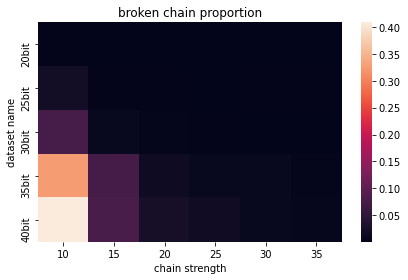

In [71]:
import seaborn as sns

names = ['{}bit'.format(i) for i in bit_list]

sns.heatmap(mean_broken_chain_proportion_list, xticklabels=new_chain_strength_list, yticklabels=names)

plt.xlabel('chain strength')
plt.ylabel('dataset name')
plt.title('broken chain proportion')

plt.tight_layout()
plt.savefig('broken_chain_proportion.png')
plt.show()

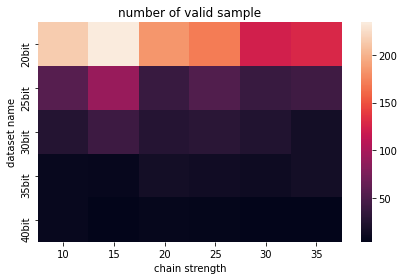

In [72]:
import seaborn as sns

names = ['{}bit'.format(i) for i in bit_list]

sns.heatmap(mean_valid_y_num_list, xticklabels=new_chain_strength_list, yticklabels=names)

plt.xlabel('chain strength')
plt.ylabel('dataset name')
plt.title('number of valid sample')

plt.tight_layout()
plt.savefig('chain_strength_valid_y_num')
plt.show()

## chain_strength_dic = {20:15, 25:15, 30:15, 35:20, 40:20}と決定

In [73]:
bit = 46
for jj in range(3):
    path = '../input/ost{}.csv'.format(bit)
    df = pd.read_csv(path, sep=',')
    bqm = aqa.make_Hamiltonian(df)

    for chain_strength in chain_strength_list:
        res = aqa.aws_get_response(bqm, chain_strength, num_reads)
        ads = aqa.aws_DSampler(df, bqm, num_reads, chain_strength, res)
        valid_y_info_dic = ads.find_valid_y()

        if len(valid_y_info_dic) > 0:
            broken_list = [valid_y_info[1] for valid_y_info in list(valid_y_info_dic.values())]
            broken_chain_proportion_46[chain_strength].append(statistics.mean(broken_list))
            valid_y_num_46[chain_strength].append(len(valid_y_info_dic))
        
        print('{} bit finished'.format(bit))#また位置間違えた

46 bit finished
46 bit finished
46 bit finished
46 bit finished
46 bit finished
46 bit finished
46 bit finished
46 bit finished
46 bit finished
46 bit finished
46 bit finished
46 bit finished
46 bit finished
46 bit finished
46 bit finished
46 bit finished
46 bit finished
46 bit finished
46 bit finished
46 bit finished
46 bit finished


In [74]:
broken_chain_proportion_46

{5: [],
 10: [],
 15: [],
 20: [0.08152173913043478,
  0.021739130434782608,
  0.043478260869565216,
  0.09782608695652174],
 25: [0.0, 0.0],
 30: [0.02717391304347826, 0.010869565217391304],
 35: [0.0, 0.0, 0.0]}

In [75]:
valid_y_num_46

{5: [],
 10: [],
 15: [],
 20: [4, 1, 1, 4],
 25: [1, 2],
 30: [4, 2],
 35: [1, 1, 1]}

In [ ]:
#20bit
